In [ ]:
Multiple Linear Regression - MLR Assignment

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
sns.set_theme(style='darkgrid',palette='rainbow')

In [3]:
# import data
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


Explore Dataset (EDA)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [5]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [6]:
# Check for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [ ]:
Visualize the Data

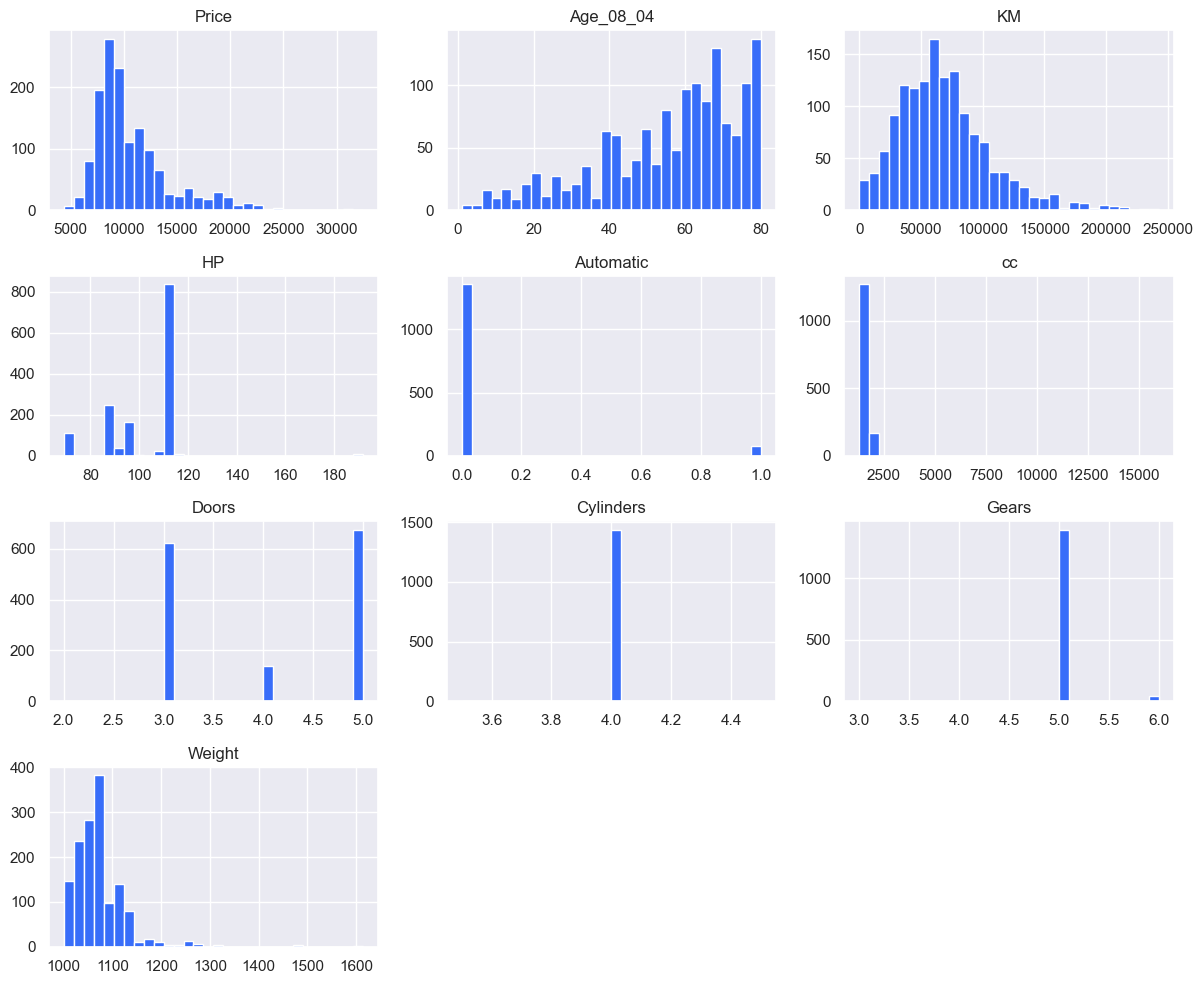

In [7]:
# Histograms for all numerical columns
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [10]:
numeric_df = df.select_dtypes(include='number')

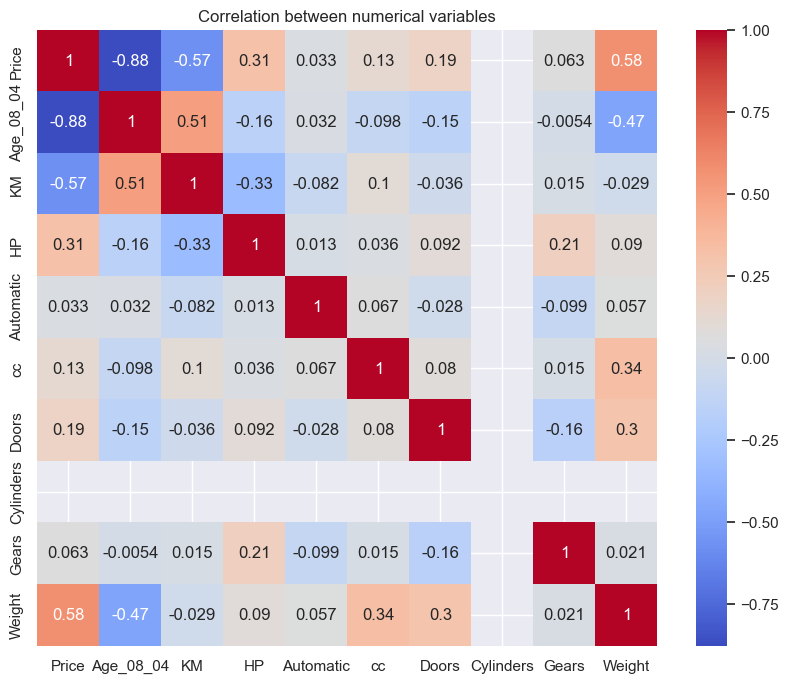

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between numerical variables")
plt.show()

In [12]:
# # Step 4: Visualizations
# sns.histplot(df['Price'], kde=True)
# plt.title("Price Distribution")
# plt.show()

In [ ]:
Preprocess the Data

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [9]:
# Separate features and target
X = df.drop(columns='Price')
y = df['Price']

In [10]:
# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
Categorical Columns: ['Fuel_Type']


In [11]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [ ]:
Split Data into Train and Test

In [17]:
# train model on one part and test on new (unseen) data

In [12]:
from sklearn.model_selection import train_test_split

 # Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
Build the Multiple Linear Regression Model

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [14]:
# Build the pipeline
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'Automatic', 'cc', 'Doors',
                                                   'Cylinders', 'Gears',
                                                   'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type'])])),
                ('regression', LinearRegression())])

In [ ]:
Evaluate the Model

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [17]:
#predictions
y_pred = model.predict(X_test)

In [18]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.8348888040611082
RMSE: 1484.265415329652
MAE: 990.8872739193968


In [ ]:
Apply Ridge and Lasso Regression

In [19]:
from sklearn.linear_model import RidgeCV, LassoCV

In [20]:
# Transform data manually for Ridge/Lasso
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [21]:
# Ridge
ridge = RidgeCV(alphas=np.logspace(-3, 3, 100)).fit(X_train_proc, y_train)
y_ridge = ridge.predict(X_test_proc)

In [22]:
# Lasso
lasso = LassoCV(alphas=np.logspace(-3, 3, 100), max_iter=5000).fit(X_train_proc, y_train)
y_lasso = lasso.predict(X_test_proc)

In [23]:
print("Ridge R²:", r2_score(y_test, y_ridge))
print("Lasso R²:", r2_score(y_test, y_lasso))

Ridge R²: 0.8454204088435118
Lasso R²: 0.8521029215048168


In [ ]:
Summary

In [ ]:
EDA Findings:

Price is right-skewed, with most cars priced between €5,000 - €15,000.

Strong correlations found between Weight, Age, KM, HP and Price.

Diesel cars generally had higher prices compared to Petrol.

Model Performance:

Linear Regression gave a good baseline model.

Ridge Regression slightly improved results by handling multicollinearity.

Lasso Regression performed feature selection by shrinking less important coefficients.

Best Model:

Ridge generally balances bias-variance tradeoff better in this dataset.

Interview Questions:

Normalization vs Standardization:

Normalization scales data between 0–1, while Standardization converts to mean=0 and std=1. Helps improve model convergence and comparability.

Handling Multicollinearity:

Use Ridge/Lasso regression, drop correlated features, or use Principal Component Analysis (PCA).